<a href="https://colab.research.google.com/github/angelaguzmanar/Salud/blob/main/Modelos_Salud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd ### para manejo de datos
import sys
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
import joblib
from sklearn.compose import ColumnTransformer

In [2]:
#conectamos con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#conectarse a BD
conn= sql.connect('/content/drive/MyDrive/Analitica3/EntregaSalud/db_saludfinal')
cur=conn.cursor()

#ver las tablas que hay en la base de datos
cur.execute("select name from sqlite_master where type='table' ")
cur.fetchall()

[('egresos',), ('usuarios',), ('cronicos',), ('final',)]

In [4]:
df = pd.read_sql('select * from final', conn)

In [5]:
df.columns

Index(['YEAR_x', 'MES_x', 'SERVICIO HABILITADO', 'NRODOC',
       'MODALIDAD CONTRATO', 'SERVICIO ADMITE', 'PISO ANTERIOR', 'VIA INGRESO',
       'BLOQUE', 'UNIDAD ESTRATEGICA', 'PISO', 'TIPO EGRESO',
       'TRANSFUSION SANGRE', 'ANTIBIOTICO', 'ALTA MEDICA',
       'DX PRINCIPAL EGRESO CAPITULO COD', 'DX PRINCIPAL EGRESO CAPITULO',
       'PROFESIONAL ESPECIALIDAD', 'PROFESIONAL ESPECIALIDAD GRD',
       'Dias_Estancia', 'SERVICIO ANTERIOR_C', 'SERVICIO EGRESO_C', 'SEXO',
       'EDAD', 'MUNICIPIO', 'PRIMERA CLASE FUNCIONAL',
       'ÃšLTIMA CLASE FUNCIONAL', 'CICLO_VITAL', 'QUINQUENIO', 'Peso', 'Talla',
       'IMC', 'Clasificacion IMC', 'Saturacion de Oxi­geno (%)',
       'Peri­metro Muslo', 'Perimetro Cintura', 'Pliegue Triceps',
       'Pliegue Abdomen', 'Pliegue Muslo', 'Sumatoria Pliegues',
       'Presion Arterial Sistolica', 'Presion Arterial Diastolica',
       'Frecuencia Cardiaca en reposo', 'Auto-calificacion Nivel de Ejercicio',
       'Constantes', 'Indice de Fragilidad

In [6]:
df['YEAR_x'] = df['YEAR_x'].astype('object')

In [7]:
df= df.sort_values(by='Dias_Estancia')

In [8]:
df= df.drop_duplicates(subset='NRODOC', keep = 'first')

In [9]:
df

,YEAR_x,MES_x,SERVICIO HABILITADO,NRODOC,MODALIDAD CONTRATO,SERVICIO ADMITE,PISO ANTERIOR,VIA INGRESO,BLOQUE,UNIDAD ESTRATEGICA,...,Hormona Estimulante de la Tiroides (TSH),Clase Funcional,Creatinina 2 consulta,Tasa de Filtracion Glomerular TFG2,Meses de diferencia entre TFG,Cambio de TFG,Remision,Diagnostico Principal,Ambito segun el medico,count_diagnosticos
181184,2021,noviembre,urgencias < 24 horas,311358,pgp,urgencias generales sã³tano,urgencias,urgencias,bloque 3,urgencias,...,0.00,clase funcional 3,0.00,0.00,0.0,0.0,grupal 3,i10x - hipertension esencial (primaria),ambulatorio,0
223442,2021,diciembre,urgencias < 24 horas,311570,pgp,urgencias generales sã³tano,sin informacion,urgencias,bloque 3,urgencias,...,10.00,clase funcional 4,1.01,33.20,0.0,0.0,grupal 2,i10x - hipertension esencial (primaria),domiciliario,3
601512,2021,diciembre,urgencias < 24 horas,306393,pgp,urgencias generales piso 1,sin informacion,urgencias,bloque 3,urgencias,...,10.00,clase funcional 4,0.00,0.00,0.0,0.0,grupal 4,i698 - secuelas de otras enfermedades cerebrov...,nd,0
311879,2021,diciembre,urgencias < 24 horas,313213,pgp,urgencias generales sã³tano,piso 1,urgencias,bloque 3,urgencias,...,1.85,clase funcional 4,0.60,28.88,0.0,0.0,grupal 2,i10x - hipertension esencial (primaria),ambulatorio,0
126871,2021,noviembre,urgencias < 24 horas,308234,pgp,urgencias generales piso 1,sin informacion,urgencias,bloque 3,urgencias,...,3.34,clase funcional 4,0.00,0.00,0.0,0.0,grupal 4,i10x - hipertension esencial (primaria),domiciliario,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447640,2021,mayo,general adultos,312661,pgp,hospitalizaciã³n,piso 9,remitido,bloque 1,hospitalizacion adultos,...,10.00,clase funcional 4,0.00,0.00,0.0,0.0,grupal 4,e106 - diabetes mellitus insulinodependiente c...,nd,0
316111,2021,septiembre,general adultos,307012,evento,cirugã­a,piso 3,consulta externa ã³ programada,bloque 1,hospitalizacion adultos,...,2.38,clase funcional 2a,0.89,79.46,0.0,0.0,grupal 2,e118 - diabetes mellitus no insulinodependient...,ambulatorio,2
133378,2021,febrero,general adultos,306258,pgp,urgencias generales sã³tano,piso 3,urgencias,bloque 1,hospitalizacion adultos,...,2.13,clase funcional 2a,1.00,54.54,0.0,0.0,grupal 3,i10x - hipertension esencial (primaria),ambulatorio,0
360667,2018,noviembre,general adultos,307382,pgp,urgencias generales sã³tano,urgencias,urgencias,bloque 1,hospitalizacion adultos,...,6.12,clase funcional 2b,0.00,0.00,0.0,0.0,grupal 2,i10x - hipertension esencial (primaria),ambulatorio,0


In [10]:
df = df[df['EDAD']>49]
df.shape

(1957, 89)

In [11]:
df1 = df.drop(columns=['NRODOC','Dias_Estancia','QUINQUENIO','Diagnostico Principal', 'DX PRINCIPAL EGRESO CAPITULO COD',  'PISO ANTERIOR', 'BLOQUE', 'PISO'])

In [12]:
df_dummys = pd.get_dummies(df1)

<ipython-input-12-7c450089b3b3>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_dummys = pd.get_dummies(df1)


In [13]:
nombre_columnas= df_dummys.columns.tolist()

In [14]:
nombre_columnas

['EDAD',
 'Peso',
 'Talla',
 'IMC',
 'Saturacion de Oxi\xadgeno (%)',
 'Peri\xadmetro Muslo',
 'Perimetro Cintura',
 'Pliegue Triceps',
 'Pliegue Abdomen',
 'Pliegue Muslo',
 'Sumatoria Pliegues',
 'Presion Arterial Sistolica',
 'Presion Arterial Diastolica',
 'Frecuencia Cardiaca en reposo',
 'Auto-calificacion Nivel de Ejercicio',
 'Constantes',
 'Indice de Fragilidad Groningen',
 'Tiempo en Segundos (Apoyo Monopodal)',
 'Tiempo en Segundos (Recorrer 5 metros)',
 'Velocidad (m/s)',
 'Glicemia',
 'Hemoglobina Glicada',
 'Años de Consumo',
 'Lipoproteina',
 'HDL',
 'Colesterol total',
 'Trigliceridos',
 'Creatinina 1 consulta',
 'Tasa de Filtracion Glomerular TFG',
 'Microalbuminuria',
 'Hormona Estimulante de la Tiroides (TSH)',
 'Creatinina 2 consulta',
 'Tasa de Filtracion Glomerular TFG2',
 'Meses de diferencia entre TFG',
 'Cambio de TFG',
 'count_diagnosticos',
 'YEAR_x_2017',
 'YEAR_x_2018',
 'YEAR_x_2021',
 'MES_x_abril',
 'MES_x_agosto',
 'MES_x_diciembre',
 'MES_x_enero',
 'M

## Selección de Caracteristicas

In [15]:
X = df_dummys
y = df.loc[:,'Dias_Estancia'].values # target

In [16]:
from sklearn.feature_selection import VarianceThreshold

#Función de filtro de caracteristicas
def variance_threshold(X,th):
    var_thres=VarianceThreshold(threshold=th)
    var_thres.fit(X)
    new_cols = var_thres.get_support()
    return new_cols

In [17]:
# Obtener columnas seleccionadas
X_new = variance_threshold(X, 0.7)
# Nuevo dataframe
df_new = df_dummys.iloc[:,X_new]
df_new.columns

Index(['EDAD', 'Peso', 'Talla', 'IMC', 'Saturacion de Oxi­geno (%)',
       'Peri­metro Muslo', 'Perimetro Cintura', 'Pliegue Triceps',
       'Pliegue Abdomen', 'Pliegue Muslo', 'Sumatoria Pliegues',
       'Presion Arterial Sistolica', 'Presion Arterial Diastolica',
       'Frecuencia Cardiaca en reposo', 'Indice de Fragilidad Groningen',
       'Tiempo en Segundos (Apoyo Monopodal)',
       'Tiempo en Segundos (Recorrer 5 metros)', 'Glicemia',
       'Hemoglobina Glicada', 'Años de Consumo', 'Lipoproteina', 'HDL',
       'Colesterol total', 'Trigliceridos',
       'Tasa de Filtracion Glomerular TFG', 'Microalbuminuria',
       'Hormona Estimulante de la Tiroides (TSH)',
       'Tasa de Filtracion Glomerular TFG2', 'Meses de diferencia entre TFG',
       'count_diagnosticos'],
      dtype='object')

In [18]:
df_dummys = df_dummys.drop(columns=['Auto-calificacion Nivel de Ejercicio', 'Constantes', 'Velocidad (m/s)', 'Creatinina 1 consulta','Creatinina 2 consulta', 'Cambio de TFG'])

In [19]:
X = df_dummys
X

,EDAD,Peso,Talla,IMC,Saturacion de Oxi­geno (%),Peri­metro Muslo,Perimetro Cintura,Pliegue Triceps,Pliegue Abdomen,Pliegue Muslo,...,Clase Funcional_clase funcional 2b,Clase Funcional_clase funcional 3,Clase Funcional_clase funcional 4,Remision_grupal 1,Remision_grupal 2,Remision_grupal 3,Remision_grupal 4,Ambito segun el medico_ambulatorio,Ambito segun el medico_domiciliario,Ambito segun el medico_nd
181184,76.0,61.0,143.0,29.83,95.0,54,88.0,25.0,48.0,44.0,...,0,1,0,0,0,1,0,1,0,0
223442,69.0,40.0,145.0,19.02,96.0,34,84.0,9.0,8.0,8.0,...,0,0,1,0,1,0,0,0,1,0
601512,74.0,51.0,150.0,22.67,96.0,38,91.0,13.0,21.0,15.0,...,0,0,1,0,0,0,1,0,0,1
311879,52.0,52.0,145.0,24.73,77.0,47,70.0,23.0,27.0,27.0,...,0,0,1,0,1,0,0,1,0,0
126871,88.0,80.0,148.0,36.52,95.0,27,95.0,12.0,10.0,10.0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447640,77.0,68.0,165.0,24.98,96.0,33,79.0,10.0,10.0,10.0,...,0,0,1,0,0,0,1,0,0,1
316111,69.0,76.0,173.0,25.39,97.0,45,109.0,20.0,25.0,15.0,...,0,0,0,0,1,0,0,1,0,0
133378,79.0,77.0,148.0,35.15,92.0,66,117.0,26.0,30.0,45.0,...,0,0,0,0,0,1,0,1,0,0
360667,57.0,83.0,163.0,31.24,98.0,54,110.0,10.0,60.0,34.0,...,1,0,0,0,1,0,0,1,0,0


In [20]:
from sklearn.feature_selection import SelectKBest, f_regression

# Función de filtro de caracteristicas - stadis. scores
def select_kbest(X,y,score_f,k):
    sel_kb = SelectKBest(score_func=score_f, k=k)
    sel_kb.fit(X,y)
    new_cols = sel_kb.get_support()
    #print("Scores:\n", sel_kb.scores_, "\nP-values:\n", sel_kb.pvalues_)
    return new_cols

In [21]:
# Obtener columnas seleciconadas - (3 caracteristicas)
X_new = select_kbest(X, y, f_regression, 200)
# Nuevo conjunto de datos
df_new = X.iloc[:,X_new]

In [22]:
dfnewc = df_new.columns.tolist()

In [23]:
df_dummys = df_dummys.loc[:,dfnewc]

In [24]:
X= df_dummys

In [25]:
# Separación en conjuntos de entrenamiento y validación con 75% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('int').columns)
numeric_columns1=list(X.select_dtypes('float').columns)
#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns1)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

Tamaño del conjunto de entrenamiento: (1565, 200)
Tamaño del conjunto de validación: (392, 200)


In [26]:
nombre_columnas = df_dummys.columns.tolist()

In [27]:
X_train_std_df = pd.DataFrame(X_train_std)
X_train_std_df.columns= nombre_columnas
X_test_std_df = pd.DataFrame(X_test_std)
X_test_std_df.columns= nombre_columnas

## Arbol de decisión

In [28]:
treedf =tree.DecisionTreeRegressor(random_state=0)
treedf.fit(X_train_std_df, y_train)
treedfpred=treedf.predict(X_test_std_df)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Calcula el MAE (Error Medio Absoluto)
mae = mean_absolute_error(y_test, treedfpred)

# Calcula el MSE (Error Cuadrático Medio)
mse = mean_squared_error(y_test, treedfpred)

# Calcula el RMSE (Raíz del Error Cuadrático Medio)
rmse = np.sqrt(mse)

# Calcula el R^2 (Coeficiente de Determinación)
mape = mean_absolute_percentage_error(y_test, treedfpred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}")

MAE: 3.88
MSE: 42.93
RMSE: 6.55
MAPE: 0.90


##Regresión lineal

In [30]:
#vamos a relizar un modelo balanceado
from sklearn.linear_model import LinearRegression
# Crea el modelo
regr = LinearRegression() #, max_iter=1000) #class_weight="balanced",
# Calibra el modelo
regr.fit(X_train_std_df, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std_df)
# Imprime los coeficientes
#print("Coeficientes: ", regr.coef_)
# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std_df,y_train)*100) + "%")
#Realice predicciones sobre x_test_std
y_hat = regr.predict(X_test_std_df)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std_df,y_test)*100) + "%")
#print("Score: ", regr.score(X_train_std, y_pred))


Intercepto:  -10.130380019859697
Accuracy (Train): 45.78319287289487%
Accuracy (Test): 23.868324332286818%


In [31]:

# Calcula el MAE (Error Medio Absoluto)
mae = mean_absolute_error(y_test, y_hat)

# Calcula el MSE (Error Cuadrático Medio)
mse = mean_squared_error(y_test, y_hat)

# Calcula el RMSE (Raíz del Error Cuadrático Medio)
rmse = np.sqrt(mse)

# Calcula el R^2 (Coeficiente de Determinación)
mape = mean_absolute_percentage_error(y_test, y_hat)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}")

MAE: 3.49
MSE: 25.50
RMSE: 5.05
MAPE: 0.97


## Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor
#Definición del modelo
ranfor = RandomForestRegressor(random_state = 123, max_depth = 10, min_samples_leaf = 1, min_samples_split= 2)
ranfor.fit(X_train_std_df, y_train)
rpred = ranfor.predict(X_test_std_df)

In [75]:
# Calcula el MAE (Error Medio Absoluto)
mae = mean_absolute_error(y_test, rpred)

# Calcula el MSE (Error Cuadrático Medio)
mse = mean_squared_error(y_test, rpred)

# Calcula el RMSE (Raíz del Error Cuadrático Medio)
rmse = np.sqrt(mse)

# Calcula el R^2 (Coeficiente de Determinación)
mape = mean_absolute_percentage_error(y_test, rpred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}")

MAE: 3.06
MSE: 23.78
RMSE: 4.88
MAPE: 0.78


## Optimizacion de parametros

In [34]:
param_grid = {
    "max_depth": [10,20,30,None],
    "min_samples_split": [2,3,5,10],
    "min_samples_leaf": [1,3,5,10]
}

In [44]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(ranfor, param_grid, scoring='neg_mean_absolute_error', n_jobs=-1).fit(X_train_std_df, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
-3.2096914283520546


In [47]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(ranfor, param_grid, scoring='neg_mean_absolute_percentage_error', n_jobs=-1).fit(X_train_std_df, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
-24654494653508.586


In [43]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(treedf, param_grid, scoring='neg_mean_absolute_percentage_error', n_jobs=-1, cv=10).fit(X_train_std_df, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
-0.8005688142236439


## Validación cruzada

In [76]:
# Realiza una validación cruzada y guarda los resultados del accuracy

resultados_metrica = cross_val_score(ranfor, X_test_std_df, y_test, cv=10, scoring='neg_mean_absolute_percentage_error')

# Imprime los resultados del accuracy para cada fold
print("Resultados MAPE:", resultados_metrica)
print()

# Calcula la precisión media y su desviación estándar
precision_media = np.mean(resultados_metrica)
desviacion_estandar = np.std(resultados_metrica)
print("Media MAPE:", precision_media)
print("Desviacion MAPE:", desviacion_estandar)

Resultados MAPE: [-1.24648444 -0.99066119 -0.92270182 -0.68571786 -0.62888052 -0.6534116
 -0.9436061  -1.05776974 -0.70514899 -0.9519711 ]

Media MAPE: -0.8786353358310952
Desviacion MAPE: 0.19284992752584892


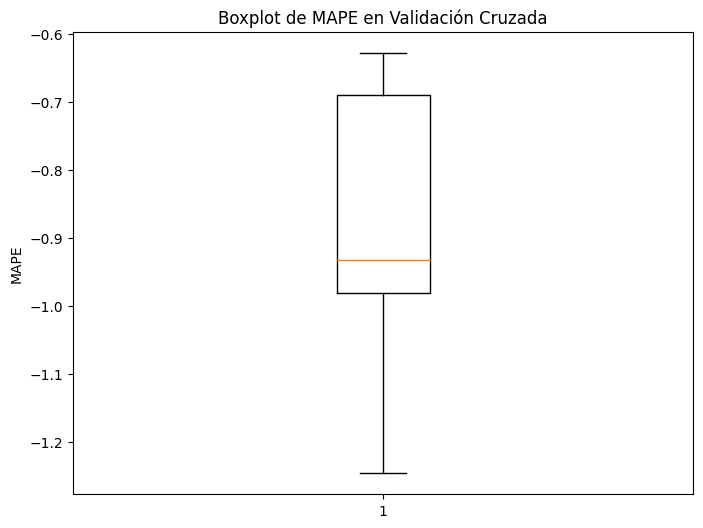

In [77]:
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico si es necesario
plt.boxplot(resultados_metrica)
plt.title('Boxplot de MAPE en Validación Cruzada')
plt.ylabel('MAPE')
plt.show()


In [72]:
# Realiza una validación cruzada y guarda los resultados del accuracy

resultados_metrica = cross_val_score(ranfor, X_test_std_df, y_test, cv=10, scoring='neg_mean_absolute_error')

# Imprime los resultados del accuracy para cada fold
print("Resultados MAE:", resultados_metrica)

# Calcula la precisión media y su desviación estándar
precision_media = np.mean(resultados_metrica)
desviacion_estandar = np.std(resultados_metrica)
print("Media MAPE:", precision_media)
print("Desviacion MAPE:", desviacion_estandar)

Resultados MAE: [-3.93475    -3.52425    -2.96435897 -3.60384615 -3.60076923 -3.15
 -2.68076923 -3.98589744 -3.27461538 -3.07358974]
Media MAPE: -3.3792846153846154
Desviacion MAPE: 0.4017564756354156


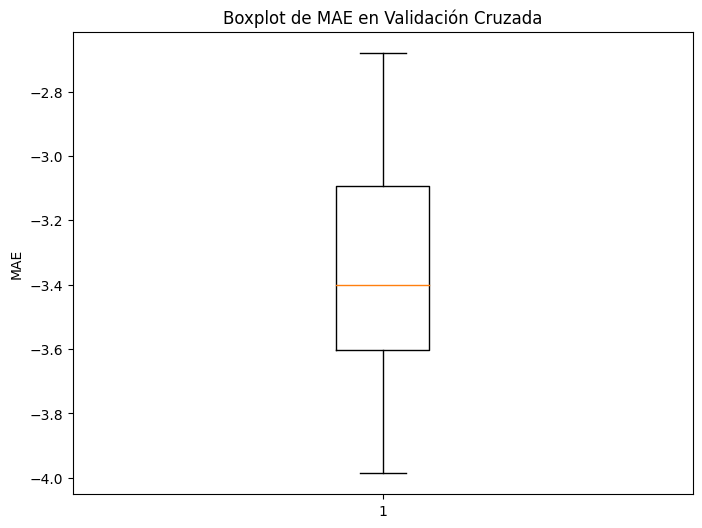

In [73]:
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico si es necesario
plt.boxplot(resultados_metrica)
plt.title('Boxplot de MAE en Validación Cruzada')
plt.ylabel('MAE')
plt.show()


## Feature importance

In [ ]:
# Obtener importancia de las características
importancias = ranfor.feature_importances_

# Crear un DataFrame con las importancias y los nombres de las características
importancias_df = pd.DataFrame({'Variable': X_train_std_df.columns, 'Importancia': importancias})
importancias_df = importancias_df.reindex(importancias_df['Importancia'].sort_values(ascending=False).index)

# Mostrar las variables más importantes
print(importancias_df)

In [ ]:
# Crear un gráfico de barras con las 10 primeras variables
plt.figure(figsize=(10, 6))
plt.barh(importancias_df['Variable'][:10], importancias_df['Importancia'][:10])
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las 10 Variables Más Importantes - Árbol de Decisión')
plt.show()
